#### Smile On 60+ is a statewide initiative in Tennessee with the goal of improving the overall health of low-income, mobile seniors age 60+ through access to oral healthcare services and community education.

More information can be found:
https://www.tn.gov/aging/administration/seniortrust-eldertrust.html
https://interfaithdentalclinic.com/smile-on-60/

___Data Questions
For this project you are tasked with using this data to determine the effectiveness of Smile On. Use the data provided to answer these questions:

1. Who has Smile On been serving (number of patients, age, gender, etc.)?
2. Explore the impact of the Smile On program and the outcomes that are produced for clients. Are clients seeing improvement through the Smile On program?
3. Is there any correlation between procedures given and improved outcomes?

Beyond the questions outlined above, you are encouraged to continue to explore the data to understand the effectiveness of the Smile On program and to try and see how different factors can impact the clinical results (eg. how do transportation options for clinics affect outcomes?).

__Smile On Data
Information about patients is gathered during different interactions (initial visit, checkups, etc.). The data you have been given include records spanning from May of 2018 through September of 2021. There is also a data dictionary that contains some useful information about the different columns.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df= pd.read_csv(r"C:\Users\jojuk\Documents\git\projects\smile-on-get_tootha_choppa\data\Smileon.csv")

C:\Users\jojuk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,32,36,53,58,59,77,83,89,93,105,127,141,144) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 81.2+ MB


In [4]:
df.shape

(57860, 184)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 81.2+ MB


**To find the number of missing values, per column, in the data set

In [6]:
df.isnull().sum()

CallReportNum                                                                                                                                                                  0
ReportVersion                                                                                                                                                                  0
LinkedToCallReportNum                                                                                                                                                      57859
CallDateAndTimeStart                                                                                                                                                           0
CallDateAndTimeEnd                                                                                                                                                             0
                                                                                                                   

**To find the number of missing values, as a percentage of each column, in the data set- first 100 rows

In [7]:
import numpy as np
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

CallReportNum - 0%
ReportVersion - 0%
LinkedToCallReportNum - 100%
CallDateAndTimeStart - 0%
CallDateAndTimeEnd - 0%
CallLength - 0%
CallerNum - 0%
PhoneWorkerNum - 0%
WasRealCall - 100%
WasHangup - 100%
WasSexCall - 100%
WasWrongNumber - 100%
WasPrankCall - 100%
WasSilentCall - 100%
GeoCode - 100%
GeoAssignment - 100%
CityName - 1%
CountyName - 0%
StateProvince - 0%
CountryName - 0%
PostalCode - 5%
CensusDivision - 100%
CensusTrack - 100%
CensusReportingArea - 100%
211Region - 100%
PhoneType - 91%
ThirdPartyName - 100%
ThirdPartyOrganization - 100%
ThirdPartyPhoneNumber - 100%
ThirdPartyAddress - 100%
ThirdPartyCity - 100%
ThirdPartyCounty - 100%
ThirdPartyStateProvince - 100%
ThirdPartyPostalCode - 100%
Narrative - 85%
VolunteerComments - 100%
Feedback - 98%
CallersFeedback - 100%
TextField2 - 100%
TextField3 - 100%
TextField4 - 100%
TextField5 - 100%
TextField6 - 100%
TextField7 - 100%
TextField8 - 100%
TextField9 - 100%
TextField10 - 100%
EnteredByWorkerNum - 0%
EnteredOn - 0%
Supe

**Missing Data Heatmap - yellow indicates missing data, y axis shows number of missing observations

<AxesSubplot:>

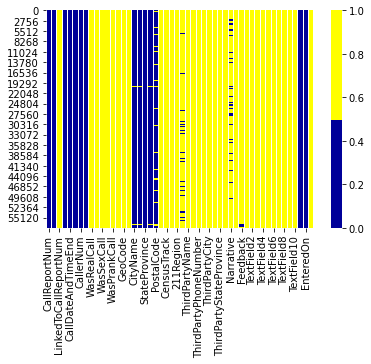

In [8]:
import seaborn as sns
figsize=(20,20)
cols = df.columns[:50]
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

**Duplicates based on  Key Features - removes duplicate data based on a set of unique identifiers

In [9]:
key = ['CallReportNum', 'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallLength', 'PhoneWorkerNum']

df.fillna(-999).groupby(key)['CallReportNum'].count().sort_values(ascending=False).head(20)

CallReportNum  CallDateAndTimeStart  CallDateAndTimeEnd  CallLength  PhoneWorkerNum
53192452       5/23/2018 14:11       5/23/2018 14:11     0           60132             1
80355245       10/29/2020 13:37      10/29/2020 13:39    2           140316            1
80343008       10/29/2020 9:27       10/29/2020 9:28     1           119506            1
80343768       8/10/2020 9:46        8/10/2020 9:46      0           116749            1
80343840       10/9/2020 9:48        10/9/2020 9:52      4           136529            1
80344699       10/20/2020 10:09      10/20/2020 10:12    3           136529            1
80345104       10/29/2020 10:18      10/29/2020 10:20    2           141066            1
80345528       7/13/2020 10:28       7/13/2020 10:29     1           116749            1
80345889       10/21/2020 10:35      10/21/2020 10:41    6           133283            1
80345959       8/7/2020 10:36        8/7/2020 10:38      2           116749            1
80346260       10/22/2020 

Drop these duplicates based on the key features

key = ['column names']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

**Drop columns with no data

In [10]:
#df=df.dropna(axis='columns') # df = df.drop('column_name', 1) where 1 is the axis number (0 for rows and 1 for columns.) 

dfnew=df.dropna(axis=1,how='all') #Drops the rows where all elements are missing.

In [11]:
df.shape

(57860, 184)

In [12]:
df.head(2)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,CityName,CountyName,StateProvince,CountryName,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,PhoneType,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyStateProvince,ThirdPartyPostalCode,Narrative,VolunteerComments,Feedback,CallersFeedback,TextField2,TextField3,TextField4,TextField5,TextField6,TextField7,TextField8,TextField9,TextField10,EnteredByWorkerNum,EnteredOn,Supervisor,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,IPAddress,OrgNum,VolIdentifier,SMILE ON 60+ Demographic Information - # of People in Household,Birth Year,SMILE ON 60+ Demographic Information - Other Language,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2393 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2950 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 4342 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7140 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7320 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE 

In [13]:
#print(df.columns.tolist())


In [14]:
#pd.reset_option('display.float_format')
df.describe()

,CallReportNum,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyPostalCode,VolunteerComments,CallersFeedback,TextField2,TextField3,TextField4,TextField5,TextField6,TextField7,TextField8,TextField9,TextField10,EnteredByWorkerNum,Supervisor,FeedbackFromPhoneWorkerNum,IPAddress,OrgNum,VolIdentifier,SMILE ON 60+ Oral Care Encounter - 1351 - Quantity,SMILE ON 60+ Oral Care Encounter - 1354 - Quantity,SMILE ON 60+ Oral Care Encounter - 2140 - Quantity,SMILE ON 60+ Oral Care Encounter - 2150 - Quantity,SMILE ON 60+ Oral Care Encounter - 2160 - Quantity,SMILE ON 60+ Oral Care Encounter - 2161 - Quantity,SMILE ON 60+ Oral Care Encounter - 220 - Quantity,SMILE ON 60+ Oral Care Encounter - 230 - Quantity,SMILE ON 60+ Oral Care Encounter - 2330 - Quantity,SMILE ON 60+ Oral Care Encounter - 2331 - Quantity,SMILE ON 60+ Oral Care Encounter - 2332 - Quantity,SMILE ON 60+ Oral Care Encounter - 2335 - Quantity,SMILE ON 60+ Oral Care Encounter - 2390 - Quantity,SMILE ON 60+ Oral Care Encounter - 2391 - Quantity,SMILE ON 60+ Oral Care Encounter - 2392 - Quantity,SMILE ON 60+ Oral Care Encounter - 2394 - Quantity,SMILE ON 60+ Oral Care Encounter - 2915 - Quantity,SMILE ON 60+ Oral Care Encounter - 2920 - Quantity,SMILE ON 60+ Oral Care Encounter - 2933 - Quantity,SMILE ON 60+ Oral Care Encounter - 2940 - Quantity,SMILE ON 60+ Oral Care Encounter - 2954 - Quantity,SMILE ON 60+ Oral Care Encounter - 2955 - Quantity,SMILE ON 60+ Oral Care Encounter - 2980 - Quantity,SMILE ON 60+ Oral Care Encounter - 3220 - Quantity,SMILE ON 60+ Oral Care Encounter - 4341 - Quantity,SMILE ON 60+ Oral Care Encounter - 6930 - Quantity,SMILE ON 60+ Oral Care Encounter - 6980 - Quantity,SMILE ON 60+ Oral Care Encounter - 7111 - Quantity,SMILE ON 60+ Oral Care Encounter - 7210 - Quantity,SMILE ON 60+ Oral Care Encounter - 7220 - Quantity,SMILE ON 60+ Oral Care Encounter - 7230 - Quantity,SMILE ON 60+ Oral Care Encounter - 7240 - Quantity,SMILE ON 60+ Oral Care Encounter - 7241 - Quantity,SMILE ON 60+ Oral Care Encounter - 7250 - Quantity,SMILE ON 60+ Oral Care Encounter - 7261 - Quantity,SMILE ON 60+ Oral Care Encounter - 7285 - Quantity,SMILE ON 60+ Oral Care Encounter - 7286 - Quantity,SMILE ON 60+ Oral Care Encounter - 7310 - Quantity,SMILE ON 60+ Oral Care Encounter - 7311 - Quantity,SMILE ON 60+ Oral Care Encounter - 7321 - Quantity,SMILE ON 60+ Oral Care Encounter - 7410 - Quantity,SMILE ON 60+ Oral Care Encounter - 7411 - Quantity,SMILE ON 60+ Oral Care Encounter - 7412 - Quantity,SMILE ON 60+ Oral Care Encounter - 7413 - Quantity,SMILE ON 60+ Oral Care Encounter - 7414 - Quantity,SMILE ON 60+ Oral Care Encounter - 7415 - Quantity,SMILE ON 60+ Oral Care Encounter - 7440 - Quantity,SMILE ON 60+ Oral Care Encounter - 7450 - Quantity,SMILE ON 60+ Oral Care Encounter - 7451 - Quantity,SMILE ON 60+ Oral Care Encounter - 7460 - Quantity,SMILE ON 60+ Oral Care Encounter - 7461 - Quantity,SMILE ON 60+ Oral Care Encounter - 7471 - Quantity,SMILE ON 60+ Oral Care Encounter - 7510 - Quantity,SMILE ON 60+ Oral Care Encounter - 7511 - Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - 7970 - Maxillary Quantity,SMILE ON 60+ Oral Care Encounter - 7971 - Quantity,SMILE ON 60+ Oral Care Encounter - 7972 - Quantity,SMILE ON 60+ Oral Care Encounter - 9110 - Quantity,SMILE ON 60+ Oral Care Encounter - 9951 - Quantity,SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Mandibular Quantity,SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Maxillary Quantity,SMILE ON 60+ Oral Care Encounter - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Oral Care Encounter - Is the treatment plan completed?,SMILE ON 60+ Oral Care Encounter - Was a treatment 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 81.2+ MB


In [16]:
df.value_counts('PhoneType')

PhoneType
Mobile    2938
Home      2139
Work        61
Other       20
Pager        2
dtype: int64

In [17]:
df.value_counts('SMILE ON 60+ Demographic Information - Gender')

SMILE ON 60+ Demographic Information - Gender
Female         35855
Male           21462
Transgender       21
Other              1
dtype: int64

In [22]:
df_demo = df[['SMILE ON 60+ Demographic Information - Gender', 'SMILE ON 60+ Demographic Information - Household Income Level', 'SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?', 'SMILE ON 60+ Demographic Information - Preferred Language/Language Needed', 'SMILE ON 60+ Demographic Information - Race/Ethnicity', 'SMILE ON 60+ Demographic Information - What other assistance programs are you on?', 'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?']]   
df_demo

,SMILE ON 60+ Demographic Information - Gender,SMILE ON 60+ Demographic Information - Household Income Level,SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?,SMILE ON 60+ Demographic Information - Preferred Language/Language Needed,SMILE ON 60+ Demographic Information - Race/Ethnicity,SMILE ON 60+ Demographic Information - What other assistance programs are you on?,SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?
0,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...
57855,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [23]:
df_demo = df_demo.rename(columns={'SMILE ON 60+ Demographic Information - Gender': 'demo_Gender', 'SMILE ON 60+ Demographic Information - Household Income Level': 'demo_Income', 'SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?': 'demo_Referral', 'SMILE ON 60+ Demographic Information - Preferred Language/Language Needed': 'demo_Language', 'SMILE ON 60+ Demographic Information - Race/Ethnicity': 'demo_Race/Ethnicity', 'SMILE ON 60+ Demographic Information - What other assistance programs are you on?': 'demo_OtherAsst', 'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?': 'demo_LastVisit'})
df_demo

,demo_Gender,demo_Income,demo_Referral,demo_Language,demo_Race/Ethnicity,demo_OtherAsst,demo_LastVisit
0,Female,$0 - $21 280,Other,English,African American,SNAP; SSI/SSDI,NaN
1,Female,$0 - $21 280,Dental Clinic Staff,English,Caucasian,NaN,More than 5 years
2,Male,$0 - $21 280,Dental Clinic Staff,NaN,Asian,NaN,Less than 12 months
3,Male,$0 - $21 280,Dental Clinic Staff,NaN,African American,NaN,More than 5 years
4,Female,$0 - $21 280,Dental Clinic Staff,NaN,African American,SSI/SSDI,3 to 5 years
...,...,...,...,...,...,...,...
57855,Female,NaN,Dental Clinic Staff,NaN,Caucasian,SNAP,Less than 12 months
57856,Female,$0 - $21 280,Dental Clinic Staff,NaN,Caucasian,SSI/SSDI,Less than 12 months
57857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,Male,$0 - $21 280,Dental Clinic Staff,English,Caucasian,SNAP,1 to 2 years


In [27]:
pivot_demo =pd.pivot_table (data=df_demo, index= ['demo_Gender'])

DataError: No numeric types to aggregate

In [33]:
df_elig = df[['SMILE ON 60+ Presumptive Eligibility - Dental Insurance?', 'SMILE ON 60+ Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?', 'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter?', 'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter?']]
print(df_elig)

      SMILE ON 60+ Presumptive Eligibility - Dental Insurance?  \
0                                                     No         
1                                                     No         
2                                                     No         
3                                                     No         
4                                                     No         
...                                                  ...         
57855                                                 No         
57856                                                 No         
57857                                                NaN         
57858                                                 No         
57859                                                 No         

      SMILE ON 60+ Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?  \
0                                                    Yes                             
1                                  

In [38]:
df_demo.demo_Income.value_counts()

$0 - $21 280     42590
$21246-$24280     7332
$24281-$27315     2323
$28806-$32920     2016
$32921-$37035      645
$36366-$41560      236
$41561-$46755      206
$43926-$50200       58
$50201-$56475       55
$51486-$58840       26
$58841-$66195       22
$59046-$67480       18
$76121-$85635        8
$66606-$76120        4
$84761-$95355        4
$67481-$75915        3
$74166-$84760        2
Name: demo_Income, dtype: int64

In [39]:
df_demo.demo_Referral.value_counts()

Dental Clinic Staff                      33302
Other                                     9780
This encounter                            3015
Wisdom Tooth Project Presentation         2160
Senior Center                             2050
SMILE ON CDHC                             1678
TV                                        1470
Flyer                                      786
Newspaper                                  297
Dental Hotline                             259
SHIP Navigator                             129
Health Assist                               68
Radio                                       60
Tennessee Alliance for Legal Services        4
Habitat for Humanity Greater Memphis         2
Name: demo_Referral, dtype: int64

In [40]:
df_demo. demo_Language.value_counts()

English    14013
Spanish     2127
Other        730
Arabic       494
Name: demo_Language, dtype: int64

In [41]:
df_demo.demo_Race/Ethnicity.value_counts()

AttributeError: 'DataFrame' object has no attribute 'demo_Race'

In [47]:
df_demo.demo_OtherAsst.value_counts()

SSI/SSDI                               12198
SNAP                                    3967
TennCare                                2061
SNAP; TennCare                          1805
SNAP; SSI/SSDI                          1792
SNAP; TennCare; SSI/SSDI                1657
TennCare; SSI/SSDI                      1443
Section 8                                920
SNAP; Section 8                          615
SNAP; TennCare; Section 8; SSI/SSDI      523
SNAP; TennCare; Section 8                483
Section 8; SSI/SSDI                      443
SNAP; Section 8; SSI/SSDI                255
TennCare; Section 8; SSI/SSDI            227
TennCare; Section 8                      217
Name: demo_OtherAsst, dtype: int64

In [48]:
df_demo['demo_LastVisit'].value_counts()

Less than 12 months    22890
More than 5 years      13365
1 to 2 years           10666
3 to 5 years            7375
Name: demo_LastVisit, dtype: int64

In [49]:
df_elig = df_elig.rename(columns={'SMILE ON 60+ Presumptive Eligibility - Dental Insurance?': 'elig_Insurance', 'SMILE ON 60+ Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?': 'elig_Prequalify', 'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter?': 'elig_NextSteps1' , 'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter?': 'elig_NextSteps2'})
df_elig

,elig_Insurance,elig_Prequalify,elig_NextSteps2,elig_NextSteps2
0,No,Yes,NaN,NaN
1,No,Yes,NaN,NaN
2,No,Yes,Continued with Navigation,Continued with Navigation
3,No,Yes,Continued with Navigation,Continued with Navigation
4,No,Yes,Continued with Navigation,Continued with Navigation
...,...,...,...,...
57855,No,Yes,Continued with Navigation,Continued with Navigation
57856,No,Yes,Continued with Navigation,Continued with Navigation
57857,NaN,NaN,NaN,NaN
57858,No,Yes,NaN,NaN


In [50]:
df_demo['demo_Gender'].value_counts()

Female         35855
Male           21462
Transgender       21
Other              1
Name: demo_Gender, dtype: int64

In [51]:
df_elig

,elig_Insurance,elig_Prequalify,elig_NextSteps2,elig_NextSteps2
0,No,Yes,NaN,NaN
1,No,Yes,NaN,NaN
2,No,Yes,Continued with Navigation,Continued with Navigation
3,No,Yes,Continued with Navigation,Continued with Navigation
4,No,Yes,Continued with Navigation,Continued with Navigation
...,...,...,...,...
57855,No,Yes,Continued with Navigation,Continued with Navigation
57856,No,Yes,Continued with Navigation,Continued with Navigation
57857,NaN,NaN,NaN,NaN
57858,No,Yes,NaN,NaN
